In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from iminuit import Minuit

Welcome to JupyROOT 6.28/06


Part1: Create exponential random numbers for a given value of tau and plot it ;
Exponential pdf = 1/τ*e^(-t/τ)

In [2]:
##transforming U(0,1) to exponential random number t
def generate_time(n1,tau):
    root_time_measurements = []
    #TODO:generate exponential random numbers->store in root_time_measurements
    x = np.random.uniform(0,1,n1)
    x1 = -(np.log(x))*tau
    #root_time_measurements = np.random.exponential(scale= tau, size =n1)
    return root_time_measurements

In [3]:
##generating exponential random number t using numpy
def generate_time_numpy(n1,tau):
    #TODO:generate random number using numpy->store in numpy_time_measurements
    numpy_time_measurements = np.random.exponential(scale= tau, size =n1)
    return numpy_time_measurements

In [4]:
##filling tree with the time measuremnets
def fill_tree_with_time(outfile, time_measurements):
    tree = ROOT.TTree("time_measurements", "Time Measurement Data")
    x=np.zeros(1, dtype=float)
    #TODO: Fill the tree branch with time measurements from outfile
    tree.Branch("x",x,'x/D')
    for ti in time_measurements:
        x[0]=ti
        tree.Fill()
    tree.Write()

In [5]:
##plot the time measurements
def plot_time_measurements(outfile):
    tree = outfile.Get("time_measurements")
    x_data = np.array([entry.x for entry in tree])
    plt.figure(figsize=(8, 6))
    plt.hist(x_data, bins=50, density=True, alpha=0.7, label="Generated Time Measurement Data")
    plt.xlabel("time")
    plt.ylabel("")
    plt.legend()
    plt.title("Generated Exponential Distribution")
    plt.show()
    plt.close('all')

In [8]:
outfile = ROOT.TFile("DecayTimeMeasurements.root", "recreate")
n1 = 1000 #number of time measurements in a particular experiment
tau = 2.2 #mean muon lifetime
time_measurements = generate_time_numpy(n1,tau) 
# print(time_measurements)
#time_measurements = generate_time_numpy(n1,tau) #generating exponential random number t using numpy
fill_tree_with_time(outfile, time_measurements) 

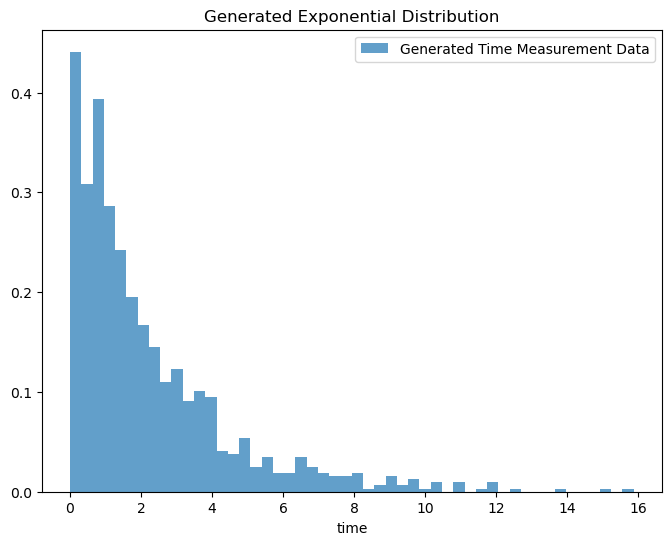

In [9]:
plot_time_measurements(outfile)

Part2: Create exponential random numbers for a given value of tau and plot it ;
Exponential pdf = 1/τ*e^(-t/τ)

In [10]:
#Unbinned NLL fit to the generated time_measurements data using Minuit
def fit_time_measurements(outfile):
    tree = outfile.Get("time_measurements")
    def fcn(tau):                                                                                                                  
        time = [entry.x for entry in tree]                                                                                         
        lnL = 0.0  
        
        for x in time:
            lnL += -np.log(tau)- x/tau
          #TODO: construct the log likelihood
        
        return -2.0*lnL     
    minuit = Minuit(fcn, tau=2)
    minuit.limits["tau"] = (2, 10)
    minuit.migrad()
    minuit.hesse()
    tau_expected = minuit.values["tau"]
    error_tau_expected = minuit.errors["tau"]
    #print("Expected tau:", tau_expected, "+/-", error_tau_expected)
    return tau_expected

In [11]:
#Plot the fit and the data
def plot_time_measurement_fit(outfile, tau_expected):
    tree = outfile.Get("time_measurements")
    x_data = np.array([entry.x for entry in tree])
    x_fit = np.linspace(0, max(x_data), 1000)
    y_fit = np.exp(-x_fit/tau_expected)/tau_expected
    plt.figure(figsize=(8, 6))
    plt.hist(x_data, bins=50, density=True, alpha=0.7, label="Generated Time Measurement Data")
    plt.plot(x_fit, y_fit, label="Fitted Exponential Distribution", color="red", linewidth=2)
    plt.xlabel("time")
    plt.ylabel("")
    plt.legend()
    plt.text(
        0.6,
        0.8,
        f'Fitted tau: {tau_expected:.4f}',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', alpha=0.8),
    )
    plt.title("Fitted Exponential Distribution")
    plt.show()
    plt.close('all')

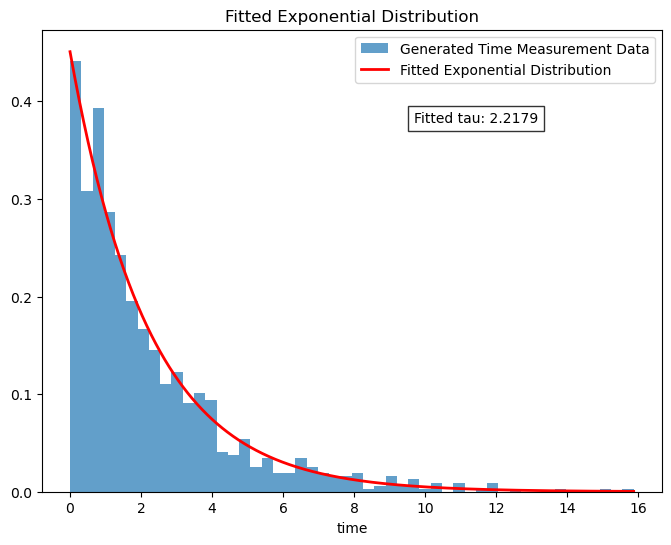

In [12]:
 # Fit distribution and then plot the fit along with data
tau_expected = fit_time_measurements(outfile)
plot_time_measurement_fit(outfile, tau_expected)

Part 3: Do n2 such experiments and plot the fitted taus ; Please have a look at the mean of the gaussian 
The Central Limit Theorem:
For samples of size  30 or more, the sample mean is approximately normally distributed, with mean μ  and standard deviation = σ/√n; where σ = std of the sample=tau, n  is the sample size. 

In [15]:
#total number of experiments
tau_expected_samples = []
x = 0
for n2 in range(1000):
    outfile = ROOT.TFile("DecayTimeMeasurements.root", "recreate")
    n1 = 500 #number of time measurements in a particular experiment
    tau = 2.2 #mean muon lifetime
    time_measurements = generate_time_numpy(n1,tau) 
    fill_tree_with_time(outfile, time_measurements) 
    x = fit_time_measurements(outfile)
    tau_expected_samples.append(x)    
    
print("Fitting the samples")
#TODO: Do n2 such experiments: for each experiment fit the n1 random number's  distribution->calculate the expected value of tau->store the expected values in tau_expected_sample

Fitting the samples


In [18]:
def plot_tau_expected(tau_expected_samples):
    plt.figure(figsize=(12, 6))
    plt.hist(tau_expected_samples, bins=30, density=True, alpha=0.7, label="tau expected")
    plt.xlabel("tau expected")
    plt.ylabel(" ")
    plt.title("Histogram of expected tau in many experiments")
    plt.legend()
    plt.show()

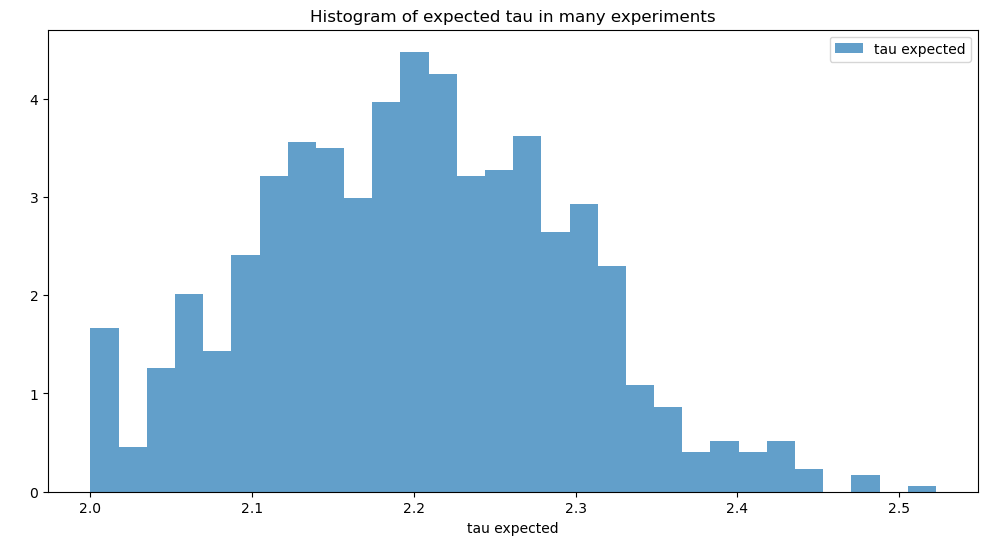

In [19]:
plot_tau_expected(tau_expected_samples)

Part 4: From the distribution of expected tau, calculate the std and match with the expected (σ/√n1) one from CLT

In [30]:
def check_error(tau_expected_samples,n1,n2,tau):
    #TODO:Find the Error on tau expected from tau_expected_samples -> tau_expected_std
    v = sum(tau_expected_samples)/n2
    modified_list = [element - v for element in tau_expected_samples]
    zz =0
    for element in modified_list:
        zz += np.square(element)
    tau_expected_std = np.sqrt(zz)/np.sqrt(n2 -1)
    tau_expected_std2 = np.std(tau_expected_samples)
    time_measurements_std = tau/(np.sqrt(n1))
    print(f"Error on the tau expected: {tau_expected_std:.4f}")
    print(f"Expected std : {time_measurements_std:.4f}")
    print(f"Ratio: {tau_expected_std / time_measurements_std:.4f}")
    print(tau_expected_std2)

In [31]:
check_error(tau_expected_samples, n1, n2, tau)

Error on the tau expected: 0.0953
Expected std : 0.0984
Ratio: 0.9684
0.09515892169832288
